In [2]:
import jax
import jax.numpy as jnp

import Project_library as pl

import numpy as np



import matplotlib.pyplot as plt


In [3]:
# Lets intialize the users with some random demand.

users_states = jax.random.bernoulli(jax.random.PRNGKey(0), p=0.5, shape=(8,)).astype(jnp.int32)

alpha = 0.9
beta = 0.4


A = jnp.array([[1-alpha, alpha]
              ,[beta, 1-beta]])

# Then lets emulate the transition to the next state and record the changes and then compute the histogram of the changes. So that I can test the attempt at prediction

time_series = jnp.zeros((users_states.shape[0],2))

key = jax.random.PRNGKey(0)

key = jax.random.split(key, (users_states.shape[0],))

pl.users_state_change(A, users_states, time_series, key)

Array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1]], dtype=int32)

36
[0 0 0 0 0 0 0 0]
[0.000e+00 0.000e+00 1.000e+00 5.000e+00 5.500e+01 3.090e+02 1.473e+03
 3.824e+03 4.333e+03]
[1 0 0 0 0 0 0 0]
[   0.    0.    0.   18.  107.  628. 2177. 4188. 2882.]
[1 1 0 0 0 0 0 0]
[0.000e+00 0.000e+00 3.000e+00 2.200e+01 2.340e+02 1.115e+03 2.834e+03
 3.955e+03 1.837e+03]
[1 1 1 0 0 0 0 0]
[   0.    0.    8.   57.  479. 1668. 3227. 3275. 1286.]
[0 0 0 0 1 1 1 1]
[0.000e+00 2.000e+00 1.800e+01 1.630e+02 7.500e+02 2.211e+03 3.320e+03
 2.665e+03 8.710e+02]
[1 1 1 1 1 0 0 0]
[1.000e+00 4.000e+00 4.700e+01 3.290e+02 1.210e+03 2.609e+03 3.141e+03
 2.066e+03 5.930e+02]
[1 1 1 1 1 1 0 0]
[   0.    6.  114.  547. 1573. 2938. 2906. 1567.  349.]
[1 1 1 1 1 1 1 0]
[2.000e+00 2.900e+01 2.300e+02 8.740e+02 2.051e+03 2.901e+03 2.440e+03
 1.253e+03 2.200e+02]
[1 1 1 1 1 1 1 1]
[   4.   65.  404. 1216. 2383. 2800. 2058.  896.  174.]
[[0.000e+00 0.000e+00 1.000e+00 5.000e+00 5.500e+01 3.090e+02 1.473e+03
  3.824e+03 4.333e+03]
 [0.000e+00 0.000e+00 0.000e+00 1.800e+01 1.070e+02

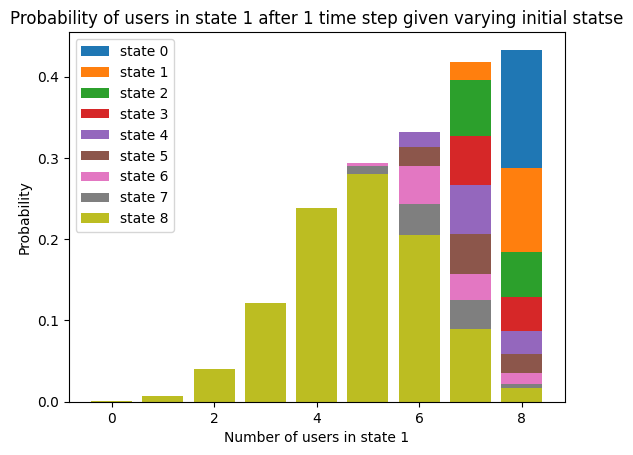

In [4]:
number_of_realizations = 10000

key = jax.random.PRNGKey(0)


users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

intial_sum = jnp.sum(users_states)

print(intial_sum)

outcome = jnp.zeros((users_states.shape[0],users_states.shape[1]+1))

# Now I want to run the simulation for a number of realizations with the same initial state
for k in range(outcome.shape[0]):
    print(users_states[k])
    for i in range(number_of_realizations):
        key = jax.random.split(key, (users_states.shape[1],))
        time_series = pl.users_state_change(A, users_states[k], time_series, key)
        # Okay now i sum up the time series for each time step 
        outcome = outcome.at[k,jnp.sum(time_series, axis=0)[1]].add(1)
        key = key[0]
    print(outcome[k])

print(outcome)
# Make a bar plot of the outcome normalized by the number of realizations
for i in range(outcome.shape[0]):
    plt.bar(jnp.arange(outcome.shape[1]), outcome[i]/number_of_realizations, label=f'state {i}')

plt.legend()
plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')
plt.title(f'Probability of users in state 1 after 1 time step given varying initial statse')
plt.show()

36
[0 0 0 0 0 0 0 0]
[1.000e+00 1.600e+01 1.190e+02 5.020e+02 1.437e+03 2.589e+03 2.943e+03
 1.939e+03 4.540e+02]
[1 0 0 0 0 0 0 0]
[2.000e+00 1.600e+01 1.100e+02 5.010e+02 1.446e+03 2.610e+03 2.909e+03
 1.886e+03 5.200e+02]
[1 1 0 0 0 0 0 0]
[   0.    8.  115.  532. 1443. 2623. 2883. 1872.  524.]
[1 1 1 0 0 0 0 0]
[   0.   17.  101.  484. 1511. 2615. 2957. 1814.  501.]
[0 0 0 0 1 1 1 1]
[1.000e+00 1.400e+01 1.140e+02 4.920e+02 1.413e+03 2.614e+03 2.944e+03
 1.869e+03 5.390e+02]
[1 1 1 1 1 0 0 0]
[2.000e+00 1.400e+01 1.200e+02 5.090e+02 1.482e+03 2.573e+03 2.906e+03
 1.886e+03 5.080e+02]
[1 1 1 1 1 1 0 0]
[1.000e+00 1.000e+01 1.220e+02 4.940e+02 1.473e+03 2.563e+03 2.961e+03
 1.858e+03 5.180e+02]
[1 1 1 1 1 1 1 0]
[   0.   19.  112.  513. 1466. 2544. 2943. 1872.  531.]
[1 1 1 1 1 1 1 1]
[   0.   10.  115.  491. 1447. 2571. 2914. 1864.  588.]
[[1.000e+00 1.600e+01 1.190e+02 5.020e+02 1.437e+03 2.589e+03 2.943e+03
  1.939e+03 4.540e+02]
 [2.000e+00 1.600e+01 1.100e+02 5.010e+02 1.446e+03

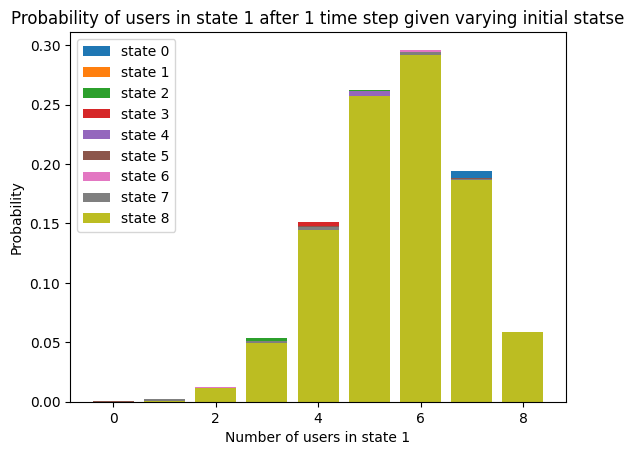

In [5]:
number_of_realizations = 10000

key = jax.random.PRNGKey(0)


users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

intial_sum = jnp.sum(users_states)

print(intial_sum)

outcome = jnp.zeros((users_states.shape[0],users_states.shape[1]+1))

time_series = jnp.zeros((users_states.shape[1],10))


# Now I want to run the simulation for a number of realizations with the same initial state
for k in range(outcome.shape[0]):
    print(users_states[k])
    for i in range(number_of_realizations):
        key = jax.random.split(key, (users_states.shape[1],))
        time_series = pl.users_state_change(A, users_states[k], time_series, key)
        # Okay now i sum up the time series for each time step 
        outcome = outcome.at[k,jnp.sum(time_series, axis=0)[9]].add(1)
        key = key[0]
    print(outcome[k])

print(outcome)
# Make a bar plot of the outcome normalized by the number of realizations
for i in range(outcome.shape[0]):
    plt.bar(jnp.arange(outcome.shape[1]), outcome[i]/number_of_realizations, label=f'state {i}')

plt.legend()
plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')
plt.title(f'Probability of users in state 1 after 1 time step given varying initial statse')
plt.show()

In [6]:
# Okay lets try and make this based on probablity theory.
# Okay so have a number of users

users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

# Okay lets calculate the probability distribution after one time step
jnp.sum(users_states, axis=1)

# Two binomial distributions, so 

Array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

<BarContainer object of 9 artists>

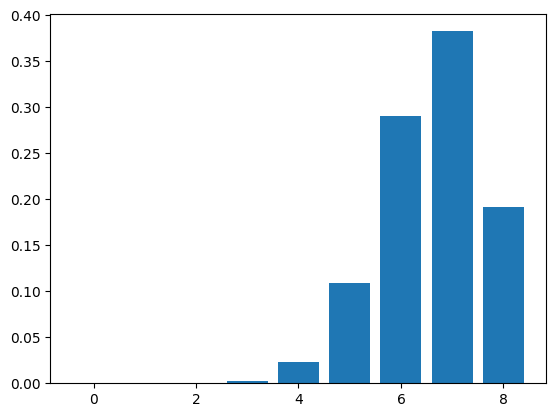

In [ ]:
# inputs:
#   s = [s1, s2, ..., s8]      # 0 or 1
#   alpha = [α1, ..., α8]
#   beta  = [β1, ..., β8]

s = [1, 1, 0, 0,0,0,0,0 ]



# 1. compute p_i for each chain
p = [ s[i]*(1-beta) + (1-s[i])*alpha for i in range(8) ]

# 2. init DP array
f = [0]*9
f[0] = 1.0

# 3. iterate chains
for pi in p:
    # update from k=8 down to 0
    for k in range(8, -1, -1):
        
        stay_off = f[k] * (1 - pi)
        turn_on  = f[k-1] * pi if k > 0 else 0
        f[k] = stay_off + turn_on

# now f[k] is Pr{ exactly k chains are on }
plt.bar(jnp.arange(9), f)

In [ ]:
# Okay lets just see what is the expected value of f 
print(jnp.sum(jnp.arange(9)*jnp.array(f)))

print(jnp.arange(9)[jnp.argmax(jnp.array(f))])

# Well how would you include this into the optimization problem.

6.6000004
7


In [19]:
import scipy

In [27]:
for x in range(1,9):
    print(scipy.stats.binom.pmf(x,8,alpha/(alpha+beta)))



0.0014461242780630808
0.011388228689746756
0.051247029103860385
0.14413226935460743
0.25943808483829334
0.2918678454430798
0.18762932921340855
0.052770748841271094
